In [1]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error
from pathlib import Path
from keras.models import load_model

from config import config

from src.trading_evaluation.day_by_day_strategy import run_trading_simulation
from src.trading_evaluation.trading_plots import plot_portfolio_comparison


df_btc = pd.read_csv(
    config.DATA_DIR / "processed" / "crypto_prices" / "btc_original.csv",
    parse_dates=["date"],
    index_col="date",
)
df_eth = pd.read_csv(
    config.DATA_DIR / "processed" / "crypto_prices" / "eth_original.csv",
    parse_dates=["date"],
    index_col="date",
)

# load predictions
df_pred_btc = pd.read_csv(
    config.DATA_DIR
    / "predictions"
    / "multi_source_data"
    / "log_price_change_predictions_btc.csv",
    parse_dates=["date"],
    index_col="date",
)
df_pred_eth = pd.read_csv(
    config.DATA_DIR
    / "predictions"
    / "multi_source_data"
    / "log_price_change_predictions_eth.csv",
    parse_dates=["date"],
    index_col="date",
)

# slice original df with index of pred
df_btc = df_btc.loc[df_pred_btc.index]
df_eth = df_eth.loc[df_pred_eth.index]

[BUY] 0.000002 BTC at 43099.70 on 2022-01-14 00:00:00
[SELL] 0.000002 BTC at 21731.12 on 2022-07-08 00:00:00
[SELL] 0.000000 BTC at 19970.56 on 2022-07-11 00:00:00
[SELL] 0.000000 BTC at 19323.92 on 2022-07-12 00:00:00
[SELL] 0.000000 BTC at 20212.07 on 2022-07-13 00:00:00
[SELL] 0.000000 BTC at 20569.92 on 2022-07-14 00:00:00
[SELL] 0.000000 BTC at 20836.33 on 2022-07-15 00:00:00
[SELL] 0.000000 BTC at 22485.69 on 2022-07-18 00:00:00
[SELL] 0.000000 BTC at 23389.43 on 2022-07-19 00:00:00
[SELL] 0.000000 BTC at 23231.73 on 2022-07-20 00:00:00
[SELL] 0.000000 BTC at 23164.63 on 2022-07-21 00:00:00
[SELL] 0.000000 BTC at 22714.98 on 2022-07-22 00:00:00
[SELL] 0.000000 BTC at 21361.70 on 2022-07-25 00:00:00
[SELL] 0.000000 BTC at 21239.75 on 2022-07-26 00:00:00
[SELL] 0.000000 BTC at 22930.55 on 2022-07-27 00:00:00
[SELL] 0.000000 BTC at 23843.89 on 2022-07-28 00:00:00
[SELL] 0.000000 BTC at 23804.63 on 2022-07-29 00:00:00
[SELL] 0.000000 BTC at 23314.20 on 2022-08-01 00:00:00
[SELL] 0.00

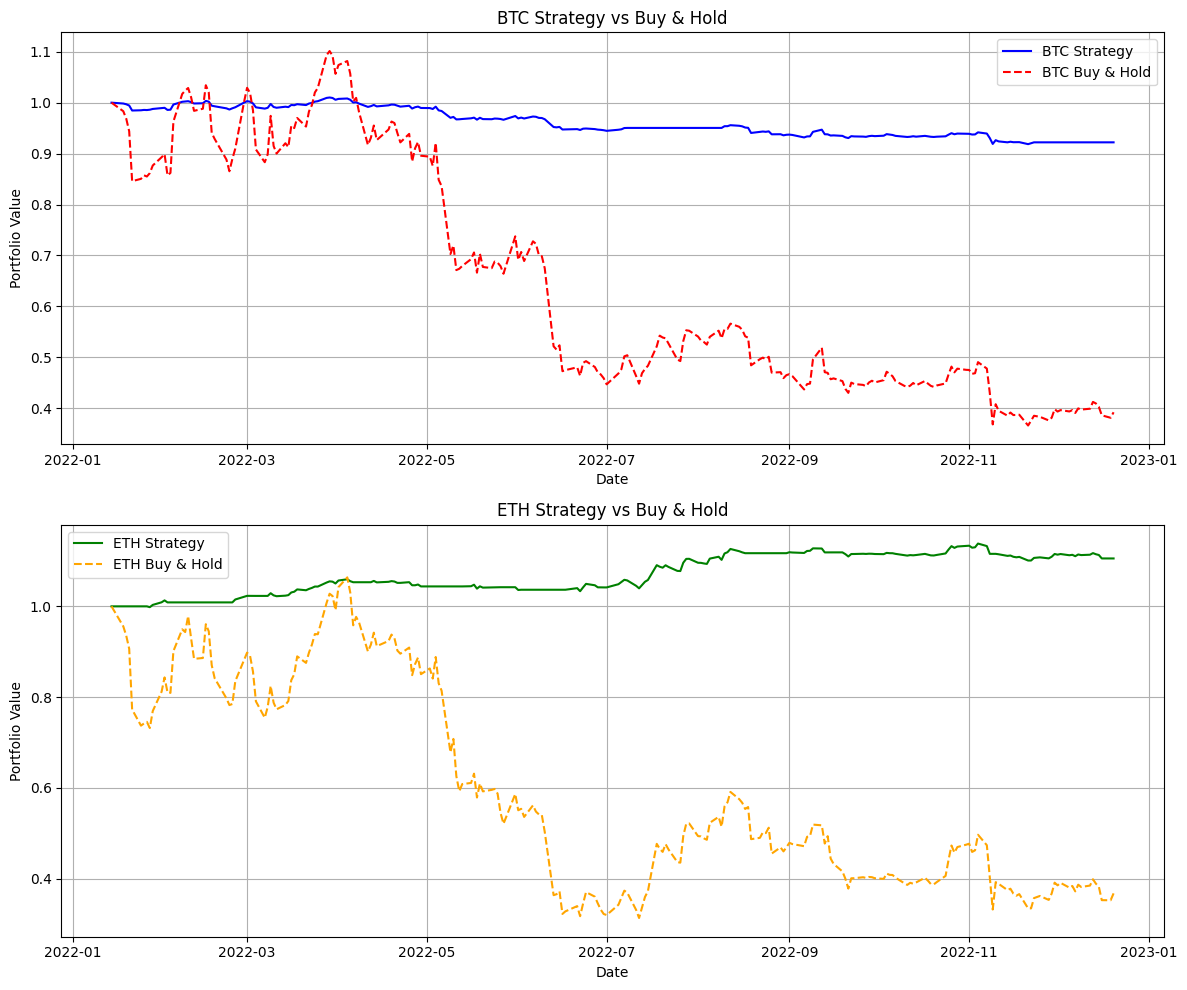

In [2]:
portfolio_btc = run_trading_simulation(
    df_pred=df_pred_btc,
    price_df=df_btc,
    crypto_symbol="BTC",
    initial_capital=1.0,
    trade_amount=0.1,
    verbose=True,
)
df_portfolio_btc = pd.DataFrame({"Portfolio Value": portfolio_btc["portfolio_values"]})
df_portfolio_btc.index = df_btc.index[: len(df_portfolio_btc)]

portfolio_eth = run_trading_simulation(
    df_pred=df_pred_eth,
    price_df=df_eth,
    crypto_symbol="ETH",
    initial_capital=1.0,
    trade_amount=0.1,
    verbose=True,
)
df_portfolio_eth = pd.DataFrame({"Portfolio Value": portfolio_eth["portfolio_values"]})
df_portfolio_eth.index = df_eth.index[: len(df_portfolio_eth)]


plot_portfolio_comparison(
    df_portfolio_btc,
    df_portfolio_eth,
    df_btc,
    df_eth,
    strategy_label_btc="BTC Strategy",
    strategy_label_eth="ETH Strategy",
)